# **Лабораторная работа «Численное интегрирование».**

In [1]:
import math
import numpy as np
import pandas as pd
import sympy as sm
from sympy import *
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import itertools

Дан интеграл: $$\int_{-0.5}^{0.5} x\arccos{x}dx$$

In [2]:
def f(x):
  return x * np.arccos(x)

x = sm.symbols("x")
h = sm.symbols("h")
func = x * sm.acos(x)
a = -0.5
b = 0.5
e = 0.001

Найдите шаг интегрирования $h$ для вычисления интеграла $\int_a^bf(x)dx$ по формуле трапеций с точностью $ϵ = 0.001.$ Для вычисления шага воспользуйтесь
формулой $M\frac{|b - a|h^2}{12} < ϵ, \ M = max|f''(x)|, \  x \in [a, b].$
Указание. Шаг $h$ следует выбирать с учетом дополнительного условия: отрезок интегрирования должен разбиваться на число частей, кратное $4$. Вычисления шага $h$ должны присутствовать в лабораторной работе, в текстовом блоке. Текстовый блок поддерживает Latex-формулы.

Вычислим $M$:
$$f(x) = x\arccos{x}, \ f'(x) = \arccos{x} - \frac{x}{\sqrt{1-x^2}}, \ f''(x) = \frac{x^2 - 2}{(1-x^2)\sqrt{1-x^2}}$$
$$$$
$$M = max\bigg|\frac{x^2 - 2}{(1-x^2)\sqrt{1-x^2}}\bigg| = |-2| = 2, \ x = 0, \  x \in [-0.5, \ 0.5]$$
$$$$
Вычислим шаг интегрирования $h$:
$$2\frac{|0.5 - (-0.5)|h^2}{12}< 0.001$$
$$$$
$$\frac{h^2}{6} < 0.001$$
$$$$
$$h^2 < 0.006$$
$$$$
$$-0.0774597 < h < 0.0774597$$


Например: $$h = 0.0625, \ n = \frac{b-a}{h} = \frac{0.5 - (-0.5)}{0.0625} = 16$$
$$$$
Для $h = 0.0625$:
$$$$
$$a = -0.5, \ x_1 = -0.4375, \ x_2 = -0.375, \ x_3 = -0.3125, \ x_4 = -0.25, \ x_5 = -0.1875, \ x_6 = -0.125 \ , x_7 = -0.0625, x_8 = 0, \ x_9 = 0.0625, \ x_{10} = 0.125, \ x_{11} = 0.1875, \ x_{12} = 0.25, \ x_{13} = 0.3125, x_{14} = 0.375, x_{15} = 0.4375, \ b = 0.5$$
$$$$
$$f(a) = -1.0472, \ f(x_1) = -0.8853, \ f(x_2) = -0.7332, \ f(x_3) = -0.5901, \ f(x_4) = -0.4559, \ f(x_5) = -0.3299, \ f(x_6) = -0.2120, \ f(x_7) = -0.1021, \ f(x_8) = 0, \ f(x_9) = 0.0943, \ f(x_{10}) = 0.1807, \ f(x_{11}) = 0.2592, \ f(x_{12}) = 0.3295, \ f(x_{13}) = 0.3917, \ f(x_{14}) = 0.4449, \ f(x_{15}) = 0.4891 \ f(b) = 0.5236$$
$$$$
Для $h = 0.125$:
$$$$
$$a = -0.5, \ x_1 = -0.375, \ x_2 = -0.25, \ x_3 = -0.125, \ x_4 = 0, \ x_5 = 0.125, \ x_6 = 0.25, \ x_7 = 0.375, \ b = 0.5$$
$$$$
$$f(a) = -1.0472, \ f(x_1) = -0.7332, \ f(x_2) = -0.4559, \ f(x_3) = -0.2120 \ f(x_4) = 0, \ f(x_5) = 0.1807, \ f(x_6) = 0.3295, \ f(x_7) = 0.4449, \ f(b) = 0.5236$$

In [3]:
func_der_2 = sm.diff(sm.diff(func, x), x)
interval = sm.Interval(a, b)
M = sm.maximum(func_der_2, x, interval)
inequality = h**2 - (12 * e)/(M * np.abs(b - a)) < 0
solution = sm.solve(inequality, x)

h_1, n_1 = 0.0625, 16
h_2, n_2 = 0.125, 8
x_1_values, y_1_values = [], []
x_2_values, y_2_values = [], []

for i in range(n_1 + 1):
  x_1_values.append(a + h_1 * i)
  y_1_values.append(f(a + h_1 * i))

for i in range(n_2 + 1):
  x_2_values.append(a + h_2 * i)
  y_2_values.append(f(a + h_2 * i))

Вычислите интеграл по формуле трапеций с шагами $2h$ и $h$: $$$$ $$\int_a^bf(x)dx \approx h(\frac{y_o}{2} + y_1 + y_2 + \ ... \ + \frac{y_n}{2}), y_i = f(x_i).$$$$ $$Дайте уточненную оценку погрешности по правилу Рунге: $$Δ \approx \frac{1}{3} |I_n - I_{2n}|.$$


In [4]:
trapezoidal_method_result_h_1 = 0
trapezoidal_method_result_h_2 = 0

for i in range(n_1 + 1):
    if ((i == 0) or (i == (n_1))):
        trapezoidal_method_result_h_1 += y_1_values[i] / 2
    else:
        trapezoidal_method_result_h_1 += y_1_values[i]

for i in range(n_2 + 1):
    if ((i == 0) or (i == (n_2))):
        trapezoidal_method_result_h_2 += y_2_values[i] / 2
    else:
        trapezoidal_method_result_h_2 += y_2_values[i]

trapezoidal_method_result_h_1 *= 0.0625
trapezoidal_method_result_h_2 *= 0.125

delta = np.abs(trapezoidal_method_result_h_1 - trapezoidal_method_result_h_2) / 3

print("I_n =", trapezoidal_method_result_h_2)
print("I_2n =", trapezoidal_method_result_h_1)
print("Delta =", delta)


I_n = -0.08847113175424179
I_2n = -0.08632325808943797
Delta = 0.0007159578882679393


$$I_n = \int_{-0.5}^{0.5} x\arccos{x}dx \approx 0.0625\bigg(\frac{-1.0472}{2} - 0.8853 - 0.7332 - 0.5901 - 0.4559 - 0.3299 - 0.2120 - 0.1021 + 0 + 0.0943 + 0.1807 + 0.2592 + 0.3295 + 0.3917 + 0.4449 + 0.4891 + \frac{0.5236}{2}\bigg) = -0.086306$$
$$$$
$$I_{2n} = \int_{-0.5}^{0.5} x\arccos{x}dx \approx 0.125\bigg(\frac{-1.0472}{2} - 0.7332 - 0.4559 - 0.2120 + 0 + 0.1807 + 0.3295 + 0.4449 + \frac{0.5236}{2}\bigg) = -0.088475$$
$$$$
$$ Δ \approx \frac{1}{3} |-0.086306 - (-0.088475)| = 0.000723$$

Вычислите интеграл по формуле Симпсона с шагами $2h$ и $h$: $$$$ $$\int_a^bf(x)dx \approx \frac{h}{3}(y_0 + y_{2m} + 4(y_1 + y_3 + \ ... \ + y_{2m-1}) + 2(y_2 + y_4 + \ ... \ + y_{2m-2})), \ y_i = f(x_i).$$
$$$$
Дайте уточненную оценку погрешности по правилу Рунге для
формулы Симпсона: $$Δ \approx \frac{1}{15} |I_n - I_{2n}|.$$

$$I_n = \int_{-0.5}^{0.5} x\arccos{x}dx \approx \frac{0.0625}{3}(-1.0472 + 0.5236 + 4(-0.8853 - 0.5901 - 0.3299 - 0.1021 + 0.0943 + 0.2592 + 0.3917 + 0.4891) + 2(-0.7332 - 0.4559 - 0.2120 + 0 + 0.1807 + 0.3295 + 0.4449)) = -0.085583$$
$$$$
$$I_{2n} = \int_{-0.5}^{0.5} x\arccos{x}dx \approx \frac{0.125}{3}(-1.0472 + 0.5236 + 4(-0.7332 - 0.2120 + 0.1807 + 0.4449) + 2(-0.4559 + 0.3295)) = -0.085617$$
$$$$
$$ Δ \approx \frac{1}{15} |-0.085583 - (-0.085617)| = 0.000002267$$

In [5]:
simpson_method_result_h_1 = 0
simpson_method_result_h_2 = 0

for i in range(n_1 + 1):
    if ((i == 0) or (i == (n_1))):
        simpson_method_result_h_1 += y_1_values[i]
    elif (i % 2 == 0):
        simpson_method_result_h_1 += 2 * y_1_values[i]
    else:
        simpson_method_result_h_1 += 4 * y_1_values[i]

for i in range(n_2 + 1):
    if ((i == 0) or (i == (n_2))):
        simpson_method_result_h_2 += y_2_values[i]
    elif (i % 2 == 0):
        simpson_method_result_h_2 += 2 * y_2_values[i]
    else:
        simpson_method_result_h_2 += 4 * y_2_values[i]

simpson_method_result_h_1 *= 0.0625 / 3
simpson_method_result_h_2 *= 0.125 / 3

delta = np.abs(simpson_method_result_h_1 - simpson_method_result_h_2) / 15

print("I_n =", simpson_method_result_h_2)
print("I_2n =", simpson_method_result_h_1)
print("Delta =", delta)

I_n = -0.08561654939147334
I_2n = -0.08560730020117004
Delta = 6.166126868869156e-07


Найдите значение интеграла с помощью функций Python.

In [6]:
x = sm.Symbol('x')
f = x * sm.acos(x)
integral_value = sm.integrate(f, (x, -0.5, 0.5))
integral_value

-0.0856066570465349

Вычислите определенный интеграл по формуле Ньютона-Лейбница (вычисления
должны присутствовать в текстовом блоке). Сравните приближенные значения
интеграла с точным. Какая формула численного интегрирования дала более
точный результат?


$$\int x \arccos{x} dx = \bigg|\displaystyle{_{du \ = \ -\frac{dx}{\sqrt{1-x^2}}; \ v \ = \ \frac{x^2}{2}}^{u \ = \ \arccos{x}; \ dv \ = \ xdx}}\bigg| = \frac{x^2\arccos{x}}{2} + \frac{1}{2}\int\frac{x^2dx}{\sqrt{1-x^2}} \ (1)$$

$$(1): \int\frac{x^2dx}{\sqrt{1-x^2}} = (Ax + B)\sqrt{1-x^2} + C\int\frac{dx}{\sqrt{1-x^2}}$$
$$$$
$$ \bigg(\int\frac{x^2dx}{\sqrt{1-x^2}}\bigg)' = \bigg((Ax + B)\sqrt{1-x^2} + C\int\frac{dx}{\sqrt{1-x^2}}\bigg)' = A\,\sqrt{1-{x}^{2}}-\dfrac{x\,\left(A\,x+B\right)}{\sqrt{1-{x}^{2}}}+\dfrac{C}{\sqrt{1-{x}^{2}}}$$
$$$$
$$\dfrac{{x}^{2}}{\sqrt{1-{x}^{2}}}=\dfrac{-2\,A\,{x}^{2}-B\,x+C+A}{\sqrt{1-{x}^{2}}}$$
$$$$
$$\begin{gathered}\end{gathered}\left\{\begin{gathered}-2A=1\\-B=0\\C+A=0\end{gathered}\right.=\left\{\begin{gathered}A=-\dfrac{1}{2}\\B=0\\C=\dfrac{1}{2}\end{gathered}\right.$$
$$$$
$$\int\frac{x^2dx}{\sqrt{1-x^2}} = -\frac{1}{2}x\sqrt{1-x^2} + \frac{1}{2}\int\frac{dx}{\sqrt{1-x^2}} = -\frac{1}{2}x\sqrt{1-x^2} + \frac{1}{2}\arcsin{x}$$
$$$$
$$\int x\arccos{x}dx = \frac{x^2\arccos{x}}{2} + \frac{1}{2}\bigg(-\frac{1}{2}x\sqrt{1-x^2} + \frac{1}{2}\arcsin{x}\bigg) = \frac{x^2\arccos{x}}{2} - \frac{x\sqrt{1-x^2}}{4} + \frac{\arcsin{x}}{4} + C$$
$$$$
$$\int_{-0.5}^{0.5}x\arccos{x}dx = \bigg(\frac{x^2\arccos{x}}{2} - \frac{x\sqrt{1-x^2}}{4} + \frac{\arcsin{x}}{4}\bigg)\bigg|^{0.5}_{-0.5} = \frac{\pi}{12} - \frac{\sqrt{3}}{16} - \bigg(\frac{\pi}{24} + \frac{\sqrt{3}}{16}\bigg) = \frac{\pi}{24} - \frac{\sqrt{3}}{8} \approx -0.0856067$$

# **Лабораторная работа «Численные методы решения обыкновенных дифференциальных уравнений».**

Дана задача Коши: $ y' = 0.5(x - 1)e^xy^2 - xy, \ y(0) = 1$ на отрезке $[0, 2].$





Найдите шаг интегрирования $h$ для решения задачи Коши методом Рунге-Кутта $(IV)$ с точностью $10^{-4}.$

In [8]:
def f(x, y):
  return 0.5 * (x - 1) * math.exp(x) * y ** 2 - x * y


def runge_kutta(f, x, y, h):
  F1 = f(x, y)
  F2 = f(x + 0.5 * h, y + 0.5 * h * F1)
  F3 = f(x + 0.5 * h, y + 0.5 * h * F2)
  F4 = f(x + h, y + h * F3)
  return y + h / 6 * (F1 + 2 * F2 + 2 * F3 + F4)


def euler(f, x, y, h):
   return y + h * f(x, y)


def solve(f, xspan, y0, h, method):
  x = np.arange(xspan[0], xspan[1] + h, h)
  y = np.zeros(len(x))
  y[0] = y0

  for n in range (len(x) - 1):
    y[n + 1] = method(f, x[n], y[n], h)

  return x, y


def format_x_values(x_values, precision=3):
    formatted_values = [f"{x:.{precision}f}" for x in x_values]
    return formatted_values


y0 = 1
xspan = [0, 2]
h = 0.2

x_rk, y_rk = solve(f, xspan, y0, h, runge_kutta)
x_rk_tilda, y_rk_tilda = solve(f, xspan, y0, 2 * h, runge_kutta)
formatted_x_rk = format_x_values(x_rk, precision=3)

y_rk_delta = list(np.diff(y_rk_tilda))

for i in range(len(y_rk_delta)):
  y_rk_delta[i] = abs(y_rk_delta[i]) / 15

for i in range(0, len(y_rk), 2):
  y_rk_delta.insert(i, "")

y_rk_tilda = list(y_rk_tilda)
for i in range(1, len(y_rk), 2):
  y_rk_tilda.insert(i, "")

x_eu, y_eu = solve(f, xspan, y0, h, euler)
x_eu_tilda, y_eu_tilda = solve(f, xspan, y0, 2 * h, euler)
formatted_x_eu = format_x_values(x_eu, precision=1)

y_eu_delta = list(np.diff(y_eu_tilda))

for i in range(len(y_eu_delta)):
  y_eu_delta[i] = abs(y_eu_delta[i])

for i in range(0, len(y_eu), 2):
  y_eu_delta.insert(i, "")

y_eu_tilda = list(y_eu_tilda)
for i in range(1, len(y_eu), 2):
  y_eu_tilda.insert(i, "")

table_rk = PrettyTable()
table_eu = PrettyTable()

table_rk.add_column("x_rk", formatted_x_rk)
table_rk.add_column("y_rk", y_rk)
table_rk.add_column("y_rk_tilda", y_rk_tilda)
table_rk.add_column("y_rk_delta", y_rk_delta)

table_eu.add_column("x_eu", formatted_x_eu)
table_eu.add_column("y_eu", y_eu)
table_eu.add_column("y_eu_tilda", y_eu_tilda)
table_eu.add_column("y_eu_delta", y_eu_delta)

Найти решение задачи Коши на отрезке $[a, b]$ методом Рунге-Кутта $(IV)$ с точностью $10^{-4}.$ Построить приближенную интегральную кривую. $$y_{k + 1} = y_k + \frac{h}{6}(F_1 + 2F_2 + 2F_3 + F_4),$$ $$$$ $$F_1 = f(x_k, y_k), $$ $$$$ $$ F_2 = f(x_k + \frac{h}{2}, \ y_k + \frac{h}{2}F_1),$$ $$$$ $$ F_3 = f(x_k + \frac{h}{2}, \ y_k + \frac{h}{2}F_2),$$ $$$$  $$ F_4 = f(x_{k + 1}, \ y_k + hF_3).$$

+-------+---------------------+---------------------+----------------------+
|  x_rk |         y_rk        |      y_rk_tilda     |      y_rk_delta      |
+-------+---------------------+---------------------+----------------------+
| 0.000 |         1.0         |         1.0         |                      |
| 0.200 |  0.8922168123689851 |                     | 0.014891490413013601 |
| 0.400 |  0.7766639368686797 |  0.776627643804796  |                      |
| 0.600 |  0.662396456000368  |                     | 0.014766542811337364 |
| 0.800 |  0.555143876134763  |  0.5551295016347355 |                      |
| 1.000 | 0.45798041137397316 |                     | 0.012199818109093397 |
| 1.200 | 0.37212512021698557 | 0.37213222999833456 |                      |
| 1.400 | 0.29763575534153663 |                     | 0.009211568285463417 |
| 1.600 | 0.23392917152172624 |  0.2339587057163833 |                      |
| 1.800 |  0.1801385206590066 |                     | 0.006570665057326361 |

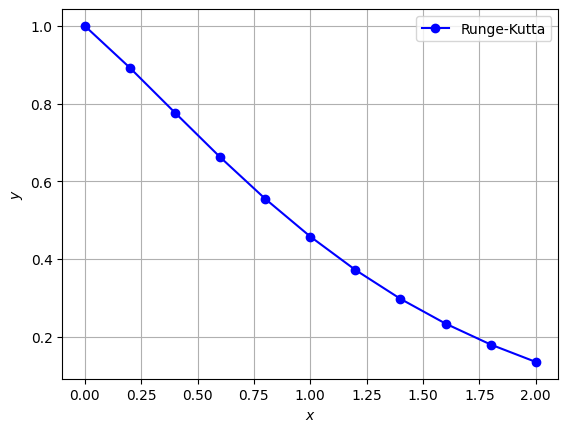

In [9]:
print(table_rk)

fig, ax = plt.subplots()
plt.plot(x_rk, y_rk, "b-o", label="Runge-Kutta")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid(True)
plt.show()

Найти решение задачи Коши на отрезке $[a, b]$ методом Эйлера $y_{k + 1} = y_k + hf(x_k, y_k).$ Построить приближенную интегральную кривую на одном графике с предыдущим пунктом.

+------+---------------------+---------------------+---------------------+
| x_eu |         y_eu        |      y_eu_tilda     |      y_eu_delta     |
+------+---------------------+---------------------+---------------------+
| 0.0  |         1.0         |         1.0         |                     |
| 0.2  |         0.9         |                     | 0.19999999999999996 |
| 0.4  |  0.784853101271221  |         0.8         |                     |
| 0.6  |  0.6669275144414224 |                     |  0.2425721367788496 |
| 0.8  |  0.5544776355307033 |  0.5574278632211505 |                     |
| 1.0  |  0.4520765652762179 |                     | 0.20603823766868334 |
| 1.2  | 0.36166125222097434 |  0.3513896255524671 |                     |
| 1.4  |  0.2835479019493307 |                     | 0.15226900674932078 |
| 1.6  | 0.21719591723211146 | 0.19912061880314633 |                     |
| 1.8  |  0.1617125045645358 |                     | 0.10387124974051841 |
| 2.0  | 0.11615231751065

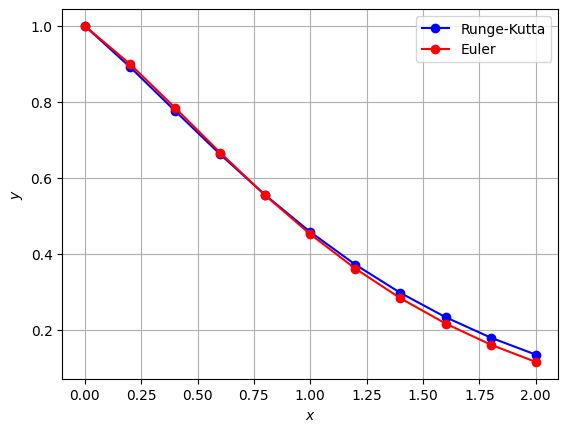

In [10]:
print(table_eu)

fig, ax = plt.subplots()
plt.plot(x_rk, y_rk, "b-o", label="Runge-Kutta")
plt.plot(x_eu, y_eu, "r-o", label="Euler")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid(True)
plt.show()

Найти решение задачи Коши с помощью функций Python.

+-------+---------------------+---------------------+---------------------+
|   x   |        Эйлер        |      Рунге-Кутт     |        Python       |
+-------+---------------------+---------------------+---------------------+
| 0.000 |         1.0         |         1.0         |         1.0         |
| 0.200 |         0.9         |  0.8922168123689851 |  0.8922506559235026 |
| 0.400 |  0.784853101271221  |  0.7766639368686797 |  0.7767798412452792 |
| 0.600 |  0.6669275144414224 |  0.662396456000368  |  0.6624115877942541 |
| 0.800 |  0.5544776355307033 |  0.555143876134763  |  0.5551099961477508 |
| 1.000 |  0.4520765652762179 | 0.45798041137397316 | 0.45809860767741617 |
| 1.200 | 0.36166125222097434 | 0.37212512021698557 | 0.37223996064644543 |
| 1.400 |  0.2835479019493307 | 0.29763575534153663 |  0.2976552410098838 |
| 1.600 | 0.21719591723211146 | 0.23392917152172624 |  0.2338170224276924 |
| 1.800 |  0.1617125045645358 |  0.1801385206590066 | 0.17997787344588223 |
| 2.000 | 0.

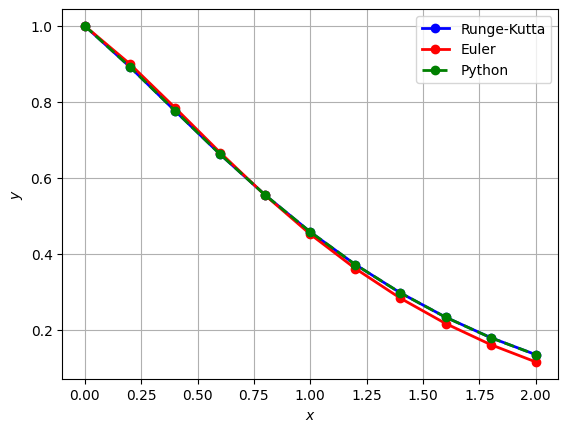

In [11]:
x_py = np.linspace(0, 2, 11)
sol = solve_ivp(f, (0, 2), [y0], dense_output=True)
y_py = sol.sol(x_py)[0]

result_table = PrettyTable()
result_table.add_column("x", formatted_x_rk)
result_table.add_column("Эйлер", y_eu)
result_table.add_column("Рунге-Кутт", y_rk)
result_table.add_column("Python", y_py)

print(result_table)

plt.plot(x_rk, y_rk, "b-o", linewidth=2, label="Runge-Kutta")
plt.plot(x_eu, y_eu, "r-o", linewidth=2, label="Euler")
plt.plot(x_py, y_py,'g--o', linewidth=2, label="Python")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid(True)
plt.show()

Найти точное решение задачи Коши. Сравнить точное решение с приближенным. Найти максимум модуля отклонений в узловых точках приближенного решения от точного.

In [12]:
x = sm.symbols('x')
y = sm.Function('y')
equation = sm.Eq(y(x).diff(x), 0.5 * (x - 1) * sm.exp(x) * (y(x)) ** 2 - x * y(x))
solution = sm.dsolve(equation, ics={y(0):1})
solution

Eq(y(x), 1/(0.5*exp(x) + 0.5*exp(0.5*x**2)))

Все расчеты должны быть представлены в виде сводных таблиц (например, Pretty Table или Pandas).